# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities

['puerto ayora',
 'mataura',
 'zalantun',
 'makasar',
 'nikolskoye',
 'shimoda',
 'bluff',
 'cherskiy',
 'comodoro rivadavia',
 'tuktoyaktuk',
 'atuona',
 'ondjiva',
 'port maria',
 'limulunga',
 'tsihombe',
 'fort nelson',
 'ust-uda',
 'erenhot',
 'chuy',
 'koungheul',
 'souillac',
 'torbay',
 'isangel',
 'port alfred',
 'half moon bay',
 'mount gambier',
 'hobart',
 'hambantota',
 'bambous virieux',
 'mozarlandia',
 'sioux lookout',
 'cape town',
 'attawapiskat',
 'nantucket',
 'buala',
 'butaritari',
 'qinzhou',
 'lebu',
 'bacuit',
 'hermanus',
 'port moresby',
 'saldanha',
 'clyde river',
 'carnarvon',
 'qaanaaq',
 'hilo',
 'tautira',
 'gbarnga',
 'punta arenas',
 'gushikawa',
 'payo',
 'bandar-e lengeh',
 'lagoa',
 'sitka',
 'svetlaya',
 'kapaa',
 'rikitea',
 'khatanga',
 'hithadhoo',
 'vaini',
 'beyneu',
 'busselton',
 'aripuana',
 'deputatskiy',
 'pustoshka',
 'karaul',
 'san borja',
 'lolua',
 'marawi',
 'cabo san lucas',
 'gamba',
 'hobyo',
 'westport',
 'auki',
 'rexburg',
 '

In [21]:
len(cities)

621

In [22]:
# Capture City to loop through
target_city = []

#cities=cities.set_index(["cities"])["city"]
cities_pd = pd.DataFrame(cities)


In [6]:
#cities = ['comodoro rivadavia',
# 'lolua',
# 'saint-philippe',
# 'baghdad',
# 'bredasdorp',
# 'ushuaia']


In [23]:
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind_speed = []

In [8]:
cities_pd["Cloudiness"] = ""
cities_pd["Country"] = ""
cities_pd["Date"] = ""
cities_pd["Humidity"] = ""
cities_pd["Latitude"] = ""
cities_pd["Longitude"] = ""
cities_pd["Temperature"] = ""
cities_pd["Wind Speed"] = ""
cities_pd.head()

,0,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,comodoro rivadavia,,,,,,,,
1,lolua,,,,,,,,
2,saint-philippe,,,,,,,,
3,baghdad,,,,,,,,
4,bredasdorp,,,,,,,,


In [24]:
#Counter

row_count = 0


# Loop through and get the weather data using the Open Weather API.

# for index, row in cities.iterrows():
# Make a request for each of the indices

#for city in cities.values():

for city in cities:    
    
   # print(f"Making request number: ['cities'])")  # help.. with setting up loop
    #Open weather url.
    
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "metric"
    
    query_url = f"{url}appid={api_key}&units={units}&q={city}"
    
    #Print log to ensure the loop is working correctly.
    
    #print("Now retieving city # " + str(row_count))
    print(query_url)
    #row_count += 1
    
    #Run requests to grab the JSON at the requested URL
    
    response = requests.get(query_url).json()
    
    
    #Append the target city data to columns.
    #Use try/except to skip any cities with errors.
   
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response['dt'])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        wind_speed.append(response["wind"]["speed"])
        
    except:
        print("Error with weather data, skipping.")
        continue    
        


http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=mataura
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=zalantun
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=makasar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=shimoda
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=bluff
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=comodoro rivadavia


http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=auki
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=rexburg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=illoqqortoormiut
Error with weather data, skipping.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=vila franca do campo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=padang
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=hat yai
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eec

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=timbo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=gainsborough
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=faya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=barrow
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=acari
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=bayabas
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=provideniya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=yabrud
http://api.openwea

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=bethel
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=gostinu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=port blair
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=ilebo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=grindavik
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=zajas
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=georgetown
http://ap

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=puerto madryn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=yunjinghong
Error with weather data, skipping.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=dahra
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=santa cruz de rosales
Error with weather data, skipping.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=fernandina beach
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=mbini
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=shasta lake
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=lyubashivka
http://api.openweathe

Error with weather data, skipping.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=novovasylivka
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=caboolture
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=nago
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=nenjiang
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=aksu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=aklavik
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=rameswaram
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=adwa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&uni

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=zelenets
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=mackenzie
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=tevriz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=sibu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=sinkat
Error with weather data, skipping.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=sao joao da barra
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=goya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=ostersund
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=vrangel
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=mayumba
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=obera
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=ajdabiya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=mersing
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=caborca
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=bonthe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=saint-pierre
http://api.

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=xuddur
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=orlovskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=yakhroma
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=dauphin
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=kamenskoye
Error with weather data, skipping.
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=kidal
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=bambanglipuro
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=mokokchung
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0f

In [25]:
temp

[25,
 11.05,
 14.35,
 25.54,
 13,
 22.3,
 23.65,
 7.25,
 17,
 -2,
 25.4,
 16.9,
 23,
 17.95,
 11,
 7.25,
 6.7,
 15.85,
 23.65,
 22.67,
 15,
 21.3,
 15.6,
 21.24,
 13.1,
 16,
 26.45,
 23,
 24.75,
 9,
 14,
 22.08,
 28.5,
 28.55,
 25.4,
 8.25,
 12.05,
 24,
 17.95,
 0,
 0.4,
 -6.1,
 23.9,
 25,
 22.5,
 5,
 28,
 24.2,
 30.35,
 25,
 31.5,
 15.55,
 26.56,
 23.05,
 -2.75,
 28.5,
 20.35,
 16.7,
 13.75,
 26.75,
 1.3,
 14.25,
 22.05,
 22.6,
 28.04,
 -6.55,
 24.25,
 15.05,
 21.4,
 24.99,
 28.2,
 21,
 2,
 25.75,
 23,
 25.55,
 32.2,
 3.15,
 26.2,
 27.46,
 7,
 24.05,
 12.65,
 24.1,
 25,
 9.9,
 15.9,
 13.9,
 32,
 1.2,
 12.75,
 19.05,
 21.95,
 4,
 13.5,
 7.3,
 0,
 23.77,
 -3.5,
 1.35,
 26.4,
 7.8,
 23.5,
 28,
 23.8,
 21.75,
 17,
 11.52,
 0,
 23,
 10.42,
 3.8,
 25.85,
 27.44,
 25,
 26.51,
 16,
 7.25,
 20,
 21.4,
 15.9,
 12,
 3.95,
 16.98,
 8.65,
 21.15,
 25.65,
 25,
 23,
 14.9,
 29.25,
 20.35,
 14,
 32.1,
 16.25,
 21,
 15.55,
 23.15,
 9,
 25,
 9,
 21,
 19.8,
 30.65,
 30.44,
 25.6,
 6.75,
 1,
 8,
 11.5,
 

In [49]:
weather_dict = {
    "cloudiness":cloudiness,
    "country":country,
    "date":date,
    "humidity":humidity,
    "lat": lat,
    "long":lng,
    "temp": temp,
    "wind speed":wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(10)

,cloudiness,country,date,humidity,lat,long,temp,wind speed
0,0,EC,1537221600,61,-0.74,-90.35,25.00,9.30
1,0,NZ,1537225643,77,-46.19,168.86,11.05,3.36
2,0,CN,1537225645,81,48.00,122.72,14.35,2.06
3,0,ID,1537221600,73,-6.28,106.88,25.54,4.01
4,90,RU,1537223400,87,59.70,30.79,13.00,8.00
5,56,JP,1537225645,100,34.70,138.93,22.30,6.71
6,0,AU,1537225646,52,-23.58,149.07,23.65,5.61
7,0,RU,1537225646,67,68.75,161.30,7.25,1.26
8,20,AR,1537225200,66,-45.87,-67.48,17.00,4.10
9,75,CA,1537223940,74,69.44,-133.03,-2.00,3.60


In [ ]:
# Help.. How are the cities in groups? Are they grouping by country? BELOW

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
weather_data.to_csv("CapturedWeatherData.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

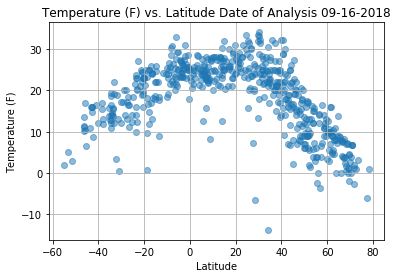

In [37]:
plt.scatter(weather_data["lat"],weather_data["temp"], alpha = 0.5)

plt.title("Temperature (F) vs. Latitude Date of Analysis 09-16-2018")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Temperature.png")
plt.grid(True)

fig1 = plt.gcf()
plt.show()

In [ ]:
# Observation
# Higher temperatures are -10 to 40 latitude this is where 
# most of the atmospheric activities begin 

#### Latitude vs. Humidity Plot

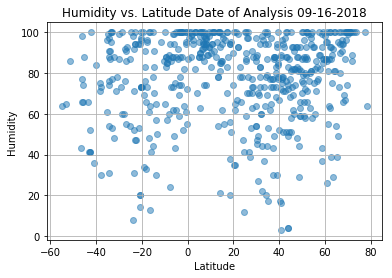

In [38]:
plt.scatter(weather_data["lat"],weather_data["humidity"], alpha = 0.5)

plt.title("Humidity vs. Latitude Date of Analysis 09-16-2018")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Humidity.png")
plt.grid(True)

fig2 = plt.gcf()
plt.show()

In [ ]:
# Observation
# Higher humidity are -40 to 60 latitude, 
# humitity plus temperature highs with the lows
# does seem to increase the liklihood of storm activities 

#### Latitude vs. Cloudiness Plot

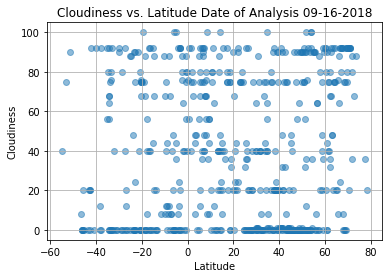

In [34]:
plt.scatter(weather_data["lat"],weather_data["cloudiness"], alpha = 0.5)

plt.title("Cloudiness vs. Latitude Date of Analysis 09-16-2018")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Cloudiness.png")
plt.grid(True)

fig3 = plt.gcf()
plt.show()

#### Latitude vs. Wind Speed Plot

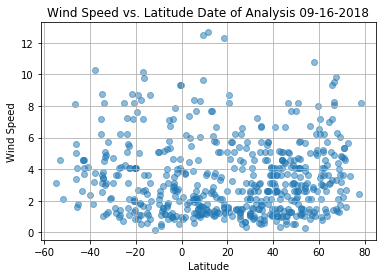

In [39]:
plt.scatter(weather_data["lat"],weather_data["wind speed"], alpha = 0.5)

plt.title("Wind Speed vs. Latitude Date of Analysis 09-16-2018")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Wind_Speed.png")
plt.grid(True)

fig4 = plt.gcf()
plt.show()

In [50]:
# low wind speed from the south can only assist
# with chruning up the cooler air which feeds
# the humdity and high temperature resulting 
# in the brith place of huricanes?